In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_absolute = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_absolute.txt', index_col=0)
Initial_absolute.index = Initial_absolute.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_absolute = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_absolute.txt', index_col=0)
Recurrence_absolute.index = Recurrence_absolute.index.map(lambda x: str(x)[:-2])

In [6]:
#add patient info for the ones with initial data
common = Initial_absolute.index.intersection(Patient_Info.index)
common2 = Recurrence_absolute.index.intersection(Patient_Info.index)
final_common = Recurrence_absolute.index.intersection(Initial_absolute.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', name='Mixture', length=181)

In [7]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
idh = combined_data.loc[:, combined_data.columns == "IDH"]
mutant = combined_data.loc[:, combined_data.columns == "1p19qcodel"]
class_data = idh.join(mutant)
class_data

IDH 1p19qcodel
Patient_ID                   
PS001        IDHwt   noncodel
PS002        IDHwt   noncodel
PS003        IDHwt   noncodel
PS004        IDHwt   noncodel
PS005        IDHwt   noncodel
PS006        IDHwt   noncodel
PS007        IDHwt   noncodel
PS008        IDHwt   noncodel
PS009       IDHmut   noncodel
PS010        IDHwt   noncodel
PS012       IDHmut   noncodel
PS019        IDHwt   noncodel
PS020        IDHwt   noncodel
PS021        IDHwt   noncodel
PS022        IDHwt   noncodel
PS023        IDHwt   noncodel
PS024        IDHwt   noncodel
PS025        IDHwt   noncodel
PS026        IDHwt   noncodel
PS027       IDHmut   noncodel
PS029        IDHwt   noncodel
PS030        IDHwt   noncodel
PS033        IDHwt   noncodel
PS034        IDHwt   noncodel
PS035        IDHwt   noncodel
PS038        IDHwt   noncodel
PS042        IDHwt   noncodel
PS056        IDHwt   noncodel
PS060        IDHwt   noncodel
PS061        IDHwt   noncodel
PS063        IDHwt   noncodel
PS064        IDHwt   noncodel
PS065        IDHwt   noncodel
PS066        IDHwt   noncodel
PS067        IDHwt   noncodel
PS068        IDHwt   noncodel
PS070        IDHwt   noncodel
PS071        IDHwt   noncodel
PS072        IDHwt   noncodel
PS074        IDHwt   noncodel
PS076       IDHmut   noncodel
PS078       IDHmut   noncodel
PS080        IDHwt   noncodel
PS081        IDHwt   noncodel
PS082        IDHwt   noncodel
PS083        IDHwt   noncodel
PS084       IDHmut   noncodel
PS085        IDHwt   noncodel
PS087        IDHwt   noncodel
PS088        IDHwt   noncodel
PS089        IDHwt   noncodel
PS090        IDHwt   noncodel
PS092        IDHwt   noncodel
PS093        IDHwt   noncodel
PS095        IDHwt   noncodel
PS099        IDHwt   noncodel
PS100        IDHwt   noncodel
PS101        IDHwt   noncodel
PS102        IDHwt   noncodel
PS103        IDHwt   noncodel
PS104        IDHwt   noncodel
PS106        IDHwt   noncodel
PS107        IDHwt   noncodel
PS108        IDHwt   noncodel
PS109        IDHwt   noncodel
PS110        IDHwt   noncodel
PS111        IDHwt   noncodel
PS112        IDHwt   noncodel
PS113        IDHwt   noncodel
PS114       IDHmut   noncodel
PS117        IDHwt   noncodel
PS118       IDHmut   noncodel
PS122        IDHwt   noncodel
PS123        IDHwt   noncodel
PS124       IDHmut   noncodel
PS125       IDHmut   noncodel
PS126       IDHmut   noncodel
PS127       IDHmut      codel
PS130       IDHmut   noncodel
PS132       IDHmut   noncodel
PS133       IDHmut   noncodel
PS135        IDHwt   noncodel
PS136       IDHmut   noncodel
PS137        IDHwt   noncodel
PS138        IDHwt   noncodel
PS139       IDHmut      codel
PS140        IDHwt   noncodel
PS141       IDHmut      codel
PS142       IDHmut   noncodel
PS143        IDHwt   noncodel
PS144       IDHmut   noncodel
PS146        IDHwt   noncodel
PS147       IDHmut   noncodel
PS148       IDHmut      codel
PS149       IDHmut   noncodel
PS150       IDHmut      codel
PS151       IDHmut   noncodel
PS152       IDHmut   noncodel
PS153       IDHmut   noncodel
PS155       IDHmut   noncodel
PS156       IDHmut   noncodel
PS157       IDHmut   noncodel
PS158        IDHwt   noncodel
PS159       IDHmut   noncodel
PS160        IDHwt   noncodel
PS161        IDHwt   noncodel
PS162        IDHwt   noncodel
PS163        IDHwt   noncodel
PS164        IDHwt   noncodel
PS165        IDHwt   noncodel
PS166       IDHmut   noncodel
PS167       IDHmut      codel
PS168        IDHwt   noncodel
PS169       IDHmut   noncodel
PS170        IDHwt   noncodel
PS171        IDHwt   noncodel
PS172       IDHmut   noncodel
PS173       IDHmut      codel
PS174       IDHmut   noncodel
PS175        IDHwt   noncodel
PS176        IDHwt   noncodel
PS177       IDHmut   noncodel
PS178       IDHmut   noncodel
PS179       IDHmut   noncodel
PS180       IDHmut      codel
PS181        IDHwt   noncodel
PS182       IDHmut   noncodel
PS184       IDHmut   noncodel
PS185       IDHmut      codel
PS186       IDHmut   noncodel
PS187        IDHwt   noncodel
PS188       IDHmut   nonc

In [8]:
#selecting for IDHwt
select = class_data[(class_data['IDH']=="IDHwt")]
class_data.loc[select.index, 'Molecular Class'] = "IDH - wildtype"
class_data

IDH 1p19qcodel Molecular Class
Patient_ID                                   
PS001        IDHwt   noncodel  IDH - wildtype
PS002        IDHwt   noncodel  IDH - wildtype
PS003        IDHwt   noncodel  IDH - wildtype
PS004        IDHwt   noncodel  IDH - wildtype
PS005        IDHwt   noncodel  IDH - wildtype
PS006        IDHwt   noncodel  IDH - wildtype
PS007        IDHwt   noncodel  IDH - wildtype
PS008        IDHwt   noncodel  IDH - wildtype
PS009       IDHmut   noncodel             NaN
PS010        IDHwt   noncodel  IDH - wildtype
PS012       IDHmut   noncodel             NaN
PS019        IDHwt   noncodel  IDH - wildtype
PS020        IDHwt   noncodel  IDH - wildtype
PS021        IDHwt   noncodel  IDH - wildtype
PS022        IDHwt   noncodel  IDH - wildtype
PS023        IDHwt   noncodel  IDH - wildtype
PS024        IDHwt   noncodel  IDH - wildtype
PS025        IDHwt   noncodel  IDH - wildtype
PS026        IDHwt   noncodel  IDH - wildtype
PS027       IDHmut   noncodel             NaN
PS029        IDHwt   noncodel  IDH - wildtype
PS030        IDHwt   noncodel  IDH - wildtype
PS033        IDHwt   noncodel  IDH - wildtype
PS034        IDHwt   noncodel  IDH - wildtype
PS035        IDHwt   noncodel  IDH - wildtype
PS038        IDHwt   noncodel  IDH - wildtype
PS042        IDHwt   noncodel  IDH - wildtype
PS056        IDHwt   noncodel  IDH - wildtype
PS060        IDHwt   noncodel  IDH - wildtype
PS061        IDHwt   noncodel  IDH - wildtype
PS063        IDHwt   noncodel  IDH - wildtype
PS064        IDHwt   noncodel  IDH - wildtype
PS065        IDHwt   noncodel  IDH - wildtype
PS066        IDHwt   noncodel  IDH - wildtype
PS067        IDHwt   noncodel  IDH - wildtype
PS068        IDHwt   noncodel  IDH - wildtype
PS070        IDHwt   noncodel  IDH - wildtype
PS071        IDHwt   noncodel  IDH - wildtype
PS072        IDHwt   noncodel  IDH - wildtype
PS074        IDHwt   noncodel  IDH - wildtype
PS076       IDHmut   noncodel             NaN
PS078       IDHmut   noncodel             NaN
PS080        IDHwt   noncodel  IDH - wildtype
PS081        IDHwt   noncodel  IDH - wildtype
PS082        IDHwt   noncodel  IDH - wildtype
PS083        IDHwt   noncodel  IDH - wildtype
PS084       IDHmut   noncodel             NaN
PS085        IDHwt   noncodel  IDH - wildtype
PS087        IDHwt   noncodel  IDH - wildtype
PS088        IDHwt   noncodel  IDH - wildtype
PS089        IDHwt   noncodel  IDH - wildtype
PS090        IDHwt   noncodel  IDH - wildtype
PS092        IDHwt   noncodel  IDH - wildtype
PS093        IDHwt   noncodel  IDH - wildtype
PS095        IDHwt   noncodel  IDH - wildtype
PS099        IDHwt   noncodel  IDH - wildtype
PS100        IDHwt   noncodel  IDH - wildtype
PS101        IDHwt   noncodel  IDH - wildtype
PS102        IDHwt   noncodel  IDH - wildtype
PS103        IDHwt   noncodel  IDH - wildtype
PS104        IDHwt   noncodel  IDH - wildtype
PS106        IDHwt   noncodel  IDH - wildtype
PS107        IDHwt   noncodel  IDH - wildtype
PS108        IDHwt   noncodel  IDH - wildtype
PS109        IDHwt   noncodel  IDH - wildtype
PS110        IDHwt   noncodel  IDH - wildtype
PS111        IDHwt   noncodel  IDH - wildtype
PS112        IDHwt   noncodel  IDH - wildtype
PS113        IDHwt   noncodel  IDH - wildtype
PS114       IDHmut   noncodel             NaN
PS117        IDHwt   noncodel  IDH - wildtype
PS118       IDHmut   noncodel             NaN
PS122        IDHwt   noncodel  IDH - wildtype
PS123        IDHwt   noncodel  IDH - wildtype
PS124       IDHmut   noncodel             NaN
PS125       IDHmut   noncodel             NaN
PS126       IDHmut   noncodel             NaN
PS127       IDHmut      codel             NaN
PS130       IDHmut   noncodel             NaN
PS132       IDHmut   noncodel             NaN
PS133       IDHmut   noncodel             NaN
PS135        IDHwt   noncodel  IDH - wildtype
PS136       IDHmut   noncodel             NaN
PS137        IDHwt   noncodel  IDH - wildtype
PS138        IDHwt   noncodel  IDH - wildtype
PS139       I

In [9]:
#selecting for IDH – mutant + noncodel
select2 = class_data[(class_data['IDH']=="IDHmut")&(class_data['1p19qcodel']=="noncodel")]
class_data.loc[select2.index, 'Molecular Class'] = "IDH – mutant (noncodel)"
class_data

IDH 1p19qcodel          Molecular Class
Patient_ID                                            
PS001        IDHwt   noncodel           IDH - wildtype
PS002        IDHwt   noncodel           IDH - wildtype
PS003        IDHwt   noncodel           IDH - wildtype
PS004        IDHwt   noncodel           IDH - wildtype
PS005        IDHwt   noncodel           IDH - wildtype
PS006        IDHwt   noncodel           IDH - wildtype
PS007        IDHwt   noncodel           IDH - wildtype
PS008        IDHwt   noncodel           IDH - wildtype
PS009       IDHmut   noncodel  IDH – mutant (noncodel)
PS010        IDHwt   noncodel           IDH - wildtype
PS012       IDHmut   noncodel  IDH – mutant (noncodel)
PS019        IDHwt   noncodel           IDH - wildtype
PS020        IDHwt   noncodel           IDH - wildtype
PS021        IDHwt   noncodel           IDH - wildtype
PS022        IDHwt   noncodel           IDH - wildtype
PS023        IDHwt   noncodel           IDH - wildtype
PS024        IDHwt   noncodel           IDH - wildtype
PS025        IDHwt   noncodel           IDH - wildtype
PS026        IDHwt   noncodel           IDH - wildtype
PS027       IDHmut   noncodel  IDH – mutant (noncodel)
PS029        IDHwt   noncodel           IDH - wildtype
PS030        IDHwt   noncodel           IDH - wildtype
PS033        IDHwt   noncodel           IDH - wildtype
PS034        IDHwt   noncodel           IDH - wildtype
PS035        IDHwt   noncodel           IDH - wildtype
PS038        IDHwt   noncodel           IDH - wildtype
PS042        IDHwt   noncodel           IDH - wildtype
PS056        IDHwt   noncodel           IDH - wildtype
PS060        IDHwt   noncodel           IDH - wildtype
PS061        IDHwt   noncodel           IDH - wildtype
PS063        IDHwt   noncodel           IDH - wildtype
PS064        IDHwt   noncodel           IDH - wildtype
PS065        IDHwt   noncodel           IDH - wildtype
PS066        IDHwt   noncodel           IDH - wildtype
PS067        IDHwt   noncodel           IDH - wildtype
PS068        IDHwt   noncodel           IDH - wildtype
PS070        IDHwt   noncodel           IDH - wildtype
PS071        IDHwt   noncodel           IDH - wildtype
PS072        IDHwt   noncodel           IDH - wildtype
PS074        IDHwt   noncodel           IDH - wildtype
PS076       IDHmut   noncodel  IDH – mutant (noncodel)
PS078       IDHmut   noncodel  IDH – mutant (noncodel)
PS080        IDHwt   noncodel           IDH - wildtype
PS081        IDHwt   noncodel           IDH - wildtype
PS082        IDHwt   noncodel           IDH - wildtype
PS083        IDHwt   noncodel           IDH - wildtype
PS084       IDHmut   noncodel  IDH – mutant (noncodel)
PS085        IDHwt   noncodel           IDH - wildtype
PS087        IDHwt   noncodel           IDH - wildtype
PS088        IDHwt   noncodel           IDH - wildtype
PS089        IDHwt   noncodel           IDH - wildtype
PS090        IDHwt   noncodel           IDH - wildtype
PS092        IDHwt   noncodel           IDH - wildtype
PS093        IDHwt   noncodel           IDH - wildtype
PS095        IDHwt   noncodel           IDH - wildtype
PS099        IDHwt   noncodel           IDH - wildtype
PS100        IDHwt   noncodel           IDH - wildtype
PS101        IDHwt   noncodel           IDH - wildtype
PS102        IDHwt   noncodel           IDH - wildtype
PS103        IDHwt   noncodel           IDH - wildtype
PS104        IDHwt   noncodel           IDH - wildtype
PS106        IDHwt   noncodel           IDH - wildtype
PS107        IDHwt   noncodel           IDH - wildtype
PS108        IDHwt   noncodel           IDH - wildtype
PS109        IDHwt   noncodel           IDH - wildtype
PS110        IDHwt   noncodel           IDH - wildtype
PS111        IDHwt   noncodel           IDH - wildtype
PS112        IDHwt   noncodel           IDH - wildtype
PS113        IDHwt   noncodel           IDH - wildtype
PS114       IDHmut   noncodel  IDH – mutant (noncodel)
PS117        IDHwt   noncodel           IDH - wildtype


In [10]:
class_data = class_data.fillna("IDH-mutant (codel)")
class_data

IDH 1p19qcodel          Molecular Class
Patient_ID                                            
PS001        IDHwt   noncodel           IDH - wildtype
PS002        IDHwt   noncodel           IDH - wildtype
PS003        IDHwt   noncodel           IDH - wildtype
PS004        IDHwt   noncodel           IDH - wildtype
PS005        IDHwt   noncodel           IDH - wildtype
PS006        IDHwt   noncodel           IDH - wildtype
PS007        IDHwt   noncodel           IDH - wildtype
PS008        IDHwt   noncodel           IDH - wildtype
PS009       IDHmut   noncodel  IDH – mutant (noncodel)
PS010        IDHwt   noncodel           IDH - wildtype
PS012       IDHmut   noncodel  IDH – mutant (noncodel)
PS019        IDHwt   noncodel           IDH - wildtype
PS020        IDHwt   noncodel           IDH - wildtype
PS021        IDHwt   noncodel           IDH - wildtype
PS022        IDHwt   noncodel           IDH - wildtype
PS023        IDHwt   noncodel           IDH - wildtype
PS024        IDHwt   noncodel           IDH - wildtype
PS025        IDHwt   noncodel           IDH - wildtype
PS026        IDHwt   noncodel           IDH - wildtype
PS027       IDHmut   noncodel  IDH – mutant (noncodel)
PS029        IDHwt   noncodel           IDH - wildtype
PS030        IDHwt   noncodel           IDH - wildtype
PS033        IDHwt   noncodel           IDH - wildtype
PS034        IDHwt   noncodel           IDH - wildtype
PS035        IDHwt   noncodel           IDH - wildtype
PS038        IDHwt   noncodel           IDH - wildtype
PS042        IDHwt   noncodel           IDH - wildtype
PS056        IDHwt   noncodel           IDH - wildtype
PS060        IDHwt   noncodel           IDH - wildtype
PS061        IDHwt   noncodel           IDH - wildtype
PS063        IDHwt   noncodel           IDH - wildtype
PS064        IDHwt   noncodel           IDH - wildtype
PS065        IDHwt   noncodel           IDH - wildtype
PS066        IDHwt   noncodel           IDH - wildtype
PS067        IDHwt   noncodel           IDH - wildtype
PS068        IDHwt   noncodel           IDH - wildtype
PS070        IDHwt   noncodel           IDH - wildtype
PS071        IDHwt   noncodel           IDH - wildtype
PS072        IDHwt   noncodel           IDH - wildtype
PS074        IDHwt   noncodel           IDH - wildtype
PS076       IDHmut   noncodel  IDH – mutant (noncodel)
PS078       IDHmut   noncodel  IDH – mutant (noncodel)
PS080        IDHwt   noncodel           IDH - wildtype
PS081        IDHwt   noncodel           IDH - wildtype
PS082        IDHwt   noncodel           IDH - wildtype
PS083        IDHwt   noncodel           IDH - wildtype
PS084       IDHmut   noncodel  IDH – mutant (noncodel)
PS085        IDHwt   noncodel           IDH - wildtype
PS087        IDHwt   noncodel           IDH - wildtype
PS088        IDHwt   noncodel           IDH - wildtype
PS089        IDHwt   noncodel           IDH - wildtype
PS090        IDHwt   noncodel           IDH - wildtype
PS092        IDHwt   noncodel           IDH - wildtype
PS093        IDHwt   noncodel           IDH - wildtype
PS095        IDHwt   noncodel           IDH - wildtype
PS099        IDHwt   noncodel           IDH - wildtype
PS100        IDHwt   noncodel           IDH - wildtype
PS101        IDHwt   noncodel           IDH - wildtype
PS102        IDHwt   noncodel           IDH - wildtype
PS103        IDHwt   noncodel           IDH - wildtype
PS104        IDHwt   noncodel           IDH - wildtype
PS106        IDHwt   noncodel           IDH - wildtype
PS107        IDHwt   noncodel           IDH - wildtype
PS108        IDHwt   noncodel           IDH - wildtype
PS109        IDHwt   noncodel           IDH - wildtype
PS110        IDHwt   noncodel           IDH - wildtype
PS111        IDHwt   noncodel           IDH - wildtype
PS112        IDHwt   noncodel           IDH - wildtype
PS113        IDHwt   noncodel           IDH - wildtype
PS114       IDHmut   noncodel  IDH – mutant (noncodel)
PS117        IDHwt   noncodel           IDH - wildtype


In [11]:
initial_final = pd.concat([class_data, Initial_absolute], axis=1)
initial_final = initial_final[initial_final.index.isin(final_common)]
initial_final.index.name = 'Mixture'
initial_final = initial_final.drop(['IDH', '1p19qcodel', 'P-value','Correlation','RMSE'], axis=1)
initial_final = initial_final.sort_values(by='Mixture')
initial_final['Type'] = 'Initial'
initial_final

Molecular Class   Naive B  Memory B  CD8+ naive T  \
Mixture                                                              
PS001             IDH - wildtype  0.028152  0.075570      0.146253   
PS002             IDH - wildtype  0.021507  0.136212      0.158629   
PS003             IDH - wildtype  0.006610  0.114975      0.270254   
PS004             IDH - wildtype  0.009584  0.111689      0.202716   
PS005             IDH - wildtype  0.026582  0.101913      0.213033   
PS006             IDH - wildtype  0.000000  0.173038      0.208682   
PS007             IDH - wildtype  0.043610  0.111419      0.170748   
PS008             IDH - wildtype  0.009015  0.181356      0.341306   
PS009    IDH – mutant (noncodel)  0.000000  0.180929      0.227053   
PS010             IDH - wildtype  0.035446  0.190856      0.264285   
PS012    IDH – mutant (noncodel)  0.000000  0.227015      0.330873   
PS019             IDH - wildtype  0.041092  0.094917      0.159708   
PS020             IDH - wildtype  0.018851  0.095849      0.132810   
PS021             IDH - wildtype  0.031260  0.104849      0.167074   
PS022             IDH - wildtype  0.046333  0.057280      0.106257   
PS023             IDH - wildtype  0.056691  0.068103      0.173580   
PS024             IDH - wildtype  0.037383  0.089116      0.106058   
PS025             IDH - wildtype  0.027664  0.058336      0.136355   
PS026             IDH - wildtype  0.033348  0.094752      0.160881   
PS027    IDH – mutant (noncodel)  0.000000  0.170669      0.209407   
PS029             IDH - wildtype  0.040873  0.066661      0.129265   
PS030             IDH - wildtype  0.000000  0.161641      0.231808   
PS033             IDH - wildtype  0.021235  0.067410      0.115173   
PS034             IDH - wildtype  0.031436  0.077851      0.094234   
PS035             IDH - wildtype  0.012059  0.133198      0.211579   
PS038             IDH - wildtype  0.025724  0.113643      0.195022   
PS042             IDH - wildtype  0.017585  0.063261      0.097207   
PS056             IDH - wildtype  0.016476  0.106523      0.192954   
PS060             IDH - wildtype  0.036687  0.087211      0.137172   
PS061             IDH - wildtype  0.009800  0.082625      0.218877   
PS063             IDH - wildtype  0.030610  0.094506      0.132895   
PS064             IDH - wildtype  0.001836  0.128649      0.258588   
PS065             IDH - wildtype  0.011559  0.123663      0.175774   
PS066             IDH - wildtype  0.038893  0.089130      0.199116   
PS067             IDH - wildtype  0.043579  0.071020      0.172094   
PS068             IDH - wildtype  0.000000  0.191604      0.314487   
PS070             IDH - wildtype  0.031412  0.108512      0.180145   
PS071             IDH - wildtype  0.066214  0.045448      0.375040   
PS072             IDH - wildtype  0.034604  0.102631      0.180071   
PS074             IDH - wildtype  0.020922  0.100345      0.200462   
PS076    IDH – mutant (noncodel)  0.050085  0.125800      0.316320   
PS078    IDH – mutant (noncodel)  0.013535  0.115093      0.180158   
PS080             IDH - wildtype  0.029922  0.129008      0.263694   
PS081             IDH - wildtype  0.000748  0.139635      0.238920   
PS082             IDH - wildtype  0.036096  0.065714      0.168822   
PS083             IDH - wildtype  0.015370  0.093817      0.119889   
PS084    IDH – mutant (noncodel)  0.005533  0.194311      0.312928   
PS085             IDH - wildtype  0.023375  0.076980      0.103234   
PS087             IDH - wildtype  0.018384  0.091013      0.170389   
PS088             IDH - wildtype  0.021780  0.103492      0.126180   
PS089             IDH - wildtype  0.023155  0.120318      0.157499   
PS090             IDH - wildtype  0.027930  0.077465      0.130003   
PS092             IDH - wildtype  0.031437  0.074532      0.112612   
PS093             IDH - wildtype  0.030434  0.104458      0.209010   
PS095             IDH - wildtype  0.026318  0.103031      0.132362   
PS099             IDH - wil

In [12]:
recurrence_final = pd.concat([class_data, Recurrence_absolute], axis=1)
recurrence_final = recurrence_final[recurrence_final.index.isin(final_common)]
recurrence_final.index.name = 'Mixture'
recurrence_final = recurrence_final.drop(['IDH', '1p19qcodel', 'P-value','Correlation','RMSE'], axis=1)
recurrence_final = recurrence_final.sort_values(by='Mixture')
recurrence_final['Type'] = 'Recurrence'
recurrence_final

Molecular Class   Naive B  Memory B  CD8+ naive T  \
Mixture                                                              
PS001             IDH - wildtype  0.090779  0.033450      0.181110   
PS002             IDH - wildtype  0.066847  0.077545      0.140768   
PS003             IDH - wildtype  0.064486  0.102726      0.146381   
PS004             IDH - wildtype  0.039100  0.100190      0.075614   
PS005             IDH - wildtype  0.093696  0.070452      0.207710   
PS006             IDH - wildtype  0.070762  0.053967      0.174030   
PS007             IDH - wildtype  0.081268  0.049196      0.066075   
PS008             IDH - wildtype  0.089660  0.093435      0.277336   
PS009    IDH – mutant (noncodel)  0.080203  0.089883      0.245205   
PS010             IDH - wildtype  0.094486  0.076544      0.214490   
PS012    IDH – mutant (noncodel)  0.099367  0.137877      0.286119   
PS019             IDH - wildtype  0.057311  0.060226      0.082018   
PS020             IDH - wildtype  0.049618  0.057960      0.127500   
PS021             IDH - wildtype  0.038426  0.043247      0.111705   
PS022             IDH - wildtype  0.037830  0.084337      0.138358   
PS023             IDH - wildtype  0.059788  0.069938      0.138160   
PS024             IDH - wildtype  0.052624  0.033865      0.094558   
PS025             IDH - wildtype  0.022442  0.050962      0.095163   
PS026             IDH - wildtype  0.036980  0.065449      0.081083   
PS027    IDH – mutant (noncodel)  0.053323  0.097007      0.175736   
PS029             IDH - wildtype  0.051247  0.053211      0.147569   
PS030             IDH - wildtype  0.066002  0.060550      0.089975   
PS033             IDH - wildtype  0.055759  0.021823      0.101395   
PS034             IDH - wildtype  0.060024  0.041259      0.072144   
PS035             IDH - wildtype  0.058138  0.044543      0.084964   
PS038             IDH - wildtype  0.103398  0.018619      0.120164   
PS042             IDH - wildtype  0.032544  0.058212      0.120455   
PS056             IDH - wildtype  0.083861  0.063347      0.176442   
PS060             IDH - wildtype  0.067071  0.044282      0.139501   
PS061             IDH - wildtype  0.067104  0.033007      0.151864   
PS063             IDH - wildtype  0.059308  0.036481      0.114147   
PS064             IDH - wildtype  0.100220  0.000000      0.193478   
PS065             IDH - wildtype  0.074535  0.073347      0.152199   
PS066             IDH - wildtype  0.080089  0.059685      0.153696   
PS067             IDH - wildtype  0.077313  0.017863      0.112563   
PS068             IDH - wildtype  0.090429  0.051050      0.180314   
PS070             IDH - wildtype  0.121078  0.037626      0.220041   
PS071             IDH - wildtype  0.131879  0.013129      0.236413   
PS072             IDH - wildtype  0.044860  0.084932      0.078488   
PS074             IDH - wildtype  0.049080  0.067078      0.085550   
PS076    IDH – mutant (noncodel)  0.097187  0.057282      0.264207   
PS078    IDH – mutant (noncodel)  0.068498  0.074316      0.137591   
PS080             IDH - wildtype  0.084095  0.064951      0.164684   
PS081             IDH - wildtype  0.067704  0.101841      0.191437   
PS082             IDH - wildtype  0.045979  0.055399      0.139870   
PS083             IDH - wildtype  0.142033  0.004819      0.194871   
PS084    IDH – mutant (noncodel)  0.047332  0.109391      0.249294   
PS085             IDH - wildtype  0.048477  0.058719      0.088062   
PS087             IDH - wildtype  0.079567  0.072019      0.219356   
PS088             IDH - wildtype  0.050951  0.090154      0.137013   
PS089             IDH - wildtype  0.037390  0.080175      0.134468   
PS090             IDH - wildtype  0.042951  0.067530      0.070334   
PS092             IDH - wildtype  0.062990  0.067322      0.155888   
PS093             IDH - wildtype  0.068462  0.074203      0.148511   
PS095             IDH - wildtype  0.069540  0.073815      0.089032   
PS099             IDH - wil

In [13]:
finalfinal = pd.concat([initial_final, recurrence_final]) 
finalfinal

Molecular Class   Naive B  Memory B  CD8+ naive T  \
Mixture                                                              
PS001             IDH - wildtype  0.028152  0.075570      0.146253   
PS002             IDH - wildtype  0.021507  0.136212      0.158629   
PS003             IDH - wildtype  0.006610  0.114975      0.270254   
PS004             IDH - wildtype  0.009584  0.111689      0.202716   
PS005             IDH - wildtype  0.026582  0.101913      0.213033   
PS006             IDH - wildtype  0.000000  0.173038      0.208682   
PS007             IDH - wildtype  0.043610  0.111419      0.170748   
PS008             IDH - wildtype  0.009015  0.181356      0.341306   
PS009    IDH – mutant (noncodel)  0.000000  0.180929      0.227053   
PS010             IDH - wildtype  0.035446  0.190856      0.264285   
PS012    IDH – mutant (noncodel)  0.000000  0.227015      0.330873   
PS019             IDH - wildtype  0.041092  0.094917      0.159708   
PS020             IDH - wildtype  0.018851  0.095849      0.132810   
PS021             IDH - wildtype  0.031260  0.104849      0.167074   
PS022             IDH - wildtype  0.046333  0.057280      0.106257   
PS023             IDH - wildtype  0.056691  0.068103      0.173580   
PS024             IDH - wildtype  0.037383  0.089116      0.106058   
PS025             IDH - wildtype  0.027664  0.058336      0.136355   
PS026             IDH - wildtype  0.033348  0.094752      0.160881   
PS027    IDH – mutant (noncodel)  0.000000  0.170669      0.209407   
PS029             IDH - wildtype  0.040873  0.066661      0.129265   
PS030             IDH - wildtype  0.000000  0.161641      0.231808   
PS033             IDH - wildtype  0.021235  0.067410      0.115173   
PS034             IDH - wildtype  0.031436  0.077851      0.094234   
PS035             IDH - wildtype  0.012059  0.133198      0.211579   
PS038             IDH - wildtype  0.025724  0.113643      0.195022   
PS042             IDH - wildtype  0.017585  0.063261      0.097207   
PS056             IDH - wildtype  0.016476  0.106523      0.192954   
PS060             IDH - wildtype  0.036687  0.087211      0.137172   
PS061             IDH - wildtype  0.009800  0.082625      0.218877   
PS063             IDH - wildtype  0.030610  0.094506      0.132895   
PS064             IDH - wildtype  0.001836  0.128649      0.258588   
PS065             IDH - wildtype  0.011559  0.123663      0.175774   
PS066             IDH - wildtype  0.038893  0.089130      0.199116   
PS067             IDH - wildtype  0.043579  0.071020      0.172094   
PS068             IDH - wildtype  0.000000  0.191604      0.314487   
PS070             IDH - wildtype  0.031412  0.108512      0.180145   
PS071             IDH - wildtype  0.066214  0.045448      0.375040   
PS072             IDH - wildtype  0.034604  0.102631      0.180071   
PS074             IDH - wildtype  0.020922  0.100345      0.200462   
PS076    IDH – mutant (noncodel)  0.050085  0.125800      0.316320   
PS078    IDH – mutant (noncodel)  0.013535  0.115093      0.180158   
PS080             IDH - wildtype  0.029922  0.129008      0.263694   
PS081             IDH - wildtype  0.000748  0.139635      0.238920   
PS082             IDH - wildtype  0.036096  0.065714      0.168822   
PS083             IDH - wildtype  0.015370  0.093817      0.119889   
PS084    IDH – mutant (noncodel)  0.005533  0.194311      0.312928   
PS085             IDH - wildtype  0.023375  0.076980      0.103234   
PS087             IDH - wildtype  0.018384  0.091013      0.170389   
PS088             IDH - wildtype  0.021780  0.103492      0.126180   
PS089             IDH - wildtype  0.023155  0.120318      0.157499   
PS090             IDH - wildtype  0.027930  0.077465      0.130003   
PS092             IDH - wildtype  0.031437  0.074532      0.112612   
PS093             IDH - wildtype  0.030434  0.104458      0.209010   
PS095             IDH - wildtype  0.026318  0.103031      0.132362   
PS099             IDH - wil

In [14]:
final_mdf = pd.melt(finalfinal.reset_index(), id_vars=('Mixture', 'Type','Molecular Class'))
final_mdf

Mixture        Type          Molecular Class                    variable  \
0      PS001     Initial           IDH - wildtype                     Naive B   
1      PS002     Initial           IDH - wildtype                     Naive B   
2      PS003     Initial           IDH - wildtype                     Naive B   
3      PS004     Initial           IDH - wildtype                     Naive B   
4      PS005     Initial           IDH - wildtype                     Naive B   
5      PS006     Initial           IDH - wildtype                     Naive B   
6      PS007     Initial           IDH - wildtype                     Naive B   
7      PS008     Initial           IDH - wildtype                     Naive B   
8      PS009     Initial  IDH – mutant (noncodel)                     Naive B   
9      PS010     Initial           IDH - wildtype                     Naive B   
10     PS012     Initial  IDH – mutant (noncodel)                     Naive B   
11     PS019     Initial           IDH - wildtype                     Naive B   
12     PS020     Initial           IDH - wildtype                     Naive B   
13     PS021     Initial           IDH - wildtype                     Naive B   
14     PS022     Initial           IDH - wildtype                     Naive B   
15     PS023     Initial           IDH - wildtype                     Naive B   
16     PS024     Initial           IDH - wildtype                     Naive B   
17     PS025     Initial           IDH - wildtype                     Naive B   
18     PS026     Initial           IDH - wildtype                     Naive B   
19     PS027     Initial  IDH – mutant (noncodel)                     Naive B   
20     PS029     Initial           IDH - wildtype                     Naive B   
21     PS030     Initial           IDH - wildtype                     Naive B   
22     PS033     Initial           IDH - wildtype                     Naive B   
23     PS034     Initial           IDH - wildtype                     Naive B   
24     PS035     Initial           IDH - wildtype                     Naive B   
25     PS038     Initial           IDH - wildtype                     Naive B   
26     PS042     Initial           IDH - wildtype                     Naive B   
27     PS056     Initial           IDH - wildtype                     Naive B   
28     PS060     Initial           IDH - wildtype                     Naive B   
29     PS061     Initial           IDH - wildtype                     Naive B   
30     PS063     Initial           IDH - wildtype                     Naive B   
31     PS064     Initial           IDH - wildtype                     Naive B   
32     PS065     Initial           IDH - wildtype                     Naive B   
33     PS066     Initial           IDH - wildtype                     Naive B   
34     PS067     Initial           IDH - wildtype                     Naive B   
35     PS068     Initial           IDH - wildtype                     Naive B   
36     PS070     Initial           IDH - wildtype                     Naive B   
37     PS071     Initial           IDH - wildtype                     Naive B   
38     PS072     Initial           IDH - wildtype                     Naive B   
39     PS074     Initial           IDH - wildtype                     Naive B   
40     PS076     Initial  IDH – mutant (noncodel)                     Naive B   
41     PS078     Initial  IDH – mutant (noncodel)                     Naive B   
42     PS080     Initial           IDH - wildtype                     Naive B   
43     PS081     Initial           IDH - wildtype                     Naive B   
44     PS082     Initial           IDH - wildtype                     Naive B   
45     PS083     Initial           IDH - wildtype                     Naive B   
46     PS084     Initial  IDH – mutant (noncodel)                     Naive B   
47     PS085     Initial           IDH - wildtype                     Naive B   
48     PS087     Initial           I

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.554e-13 stat=-8.731e+00
IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.652e-32 stat=-1.422e+01
IDH-mutant (codel)_Initial v.s. IDH-mutant (codel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.493e-05 stat=-5.414e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=3.200e-12 stat=8.130e+00
IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test

<ipython-input-15-60a613c9e65b>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5.1))


IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test independent samples with Bonferroni correction, P_val=8.358e-01 stat=-1.086e+00
IDH-mutant (codel)_Initial v.s. IDH-mutant (codel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.522e-01 stat=1.780e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.073e-02 stat=2.983e+00
IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test independent samples with Bonferroni correction, P_val=8.708e-01 stat=-1.060e+00
IDH-mutant (codel)_Initial v.s. IDH-mutant (codel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=6.216e-01


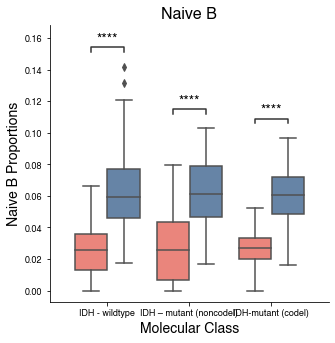

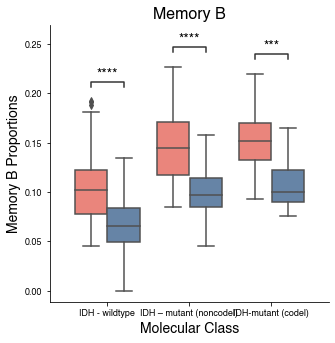

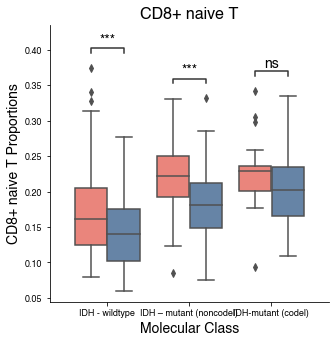

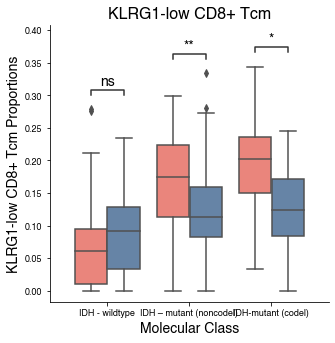

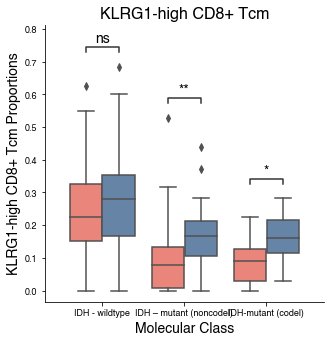

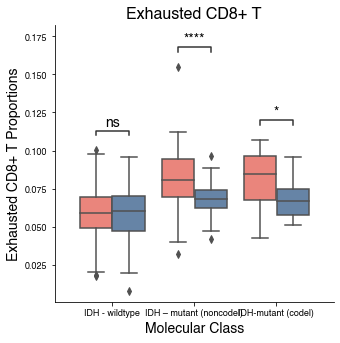

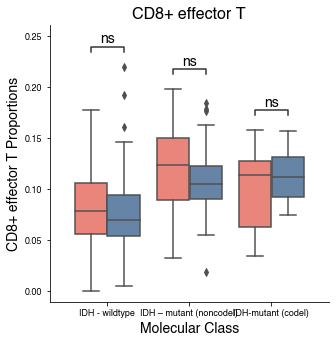

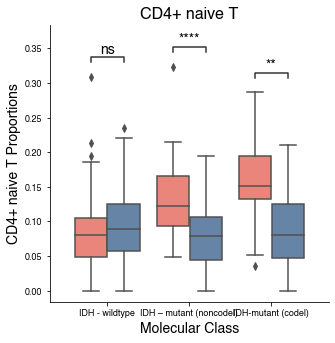

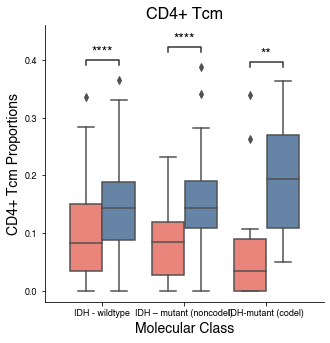

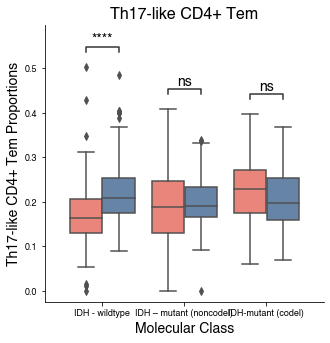

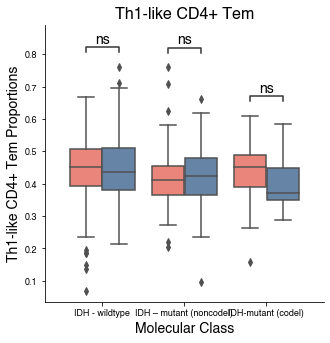

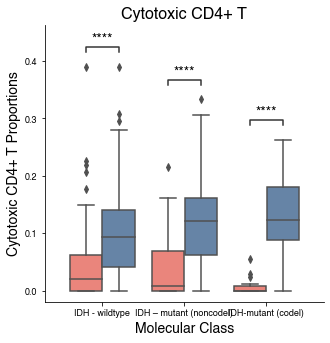

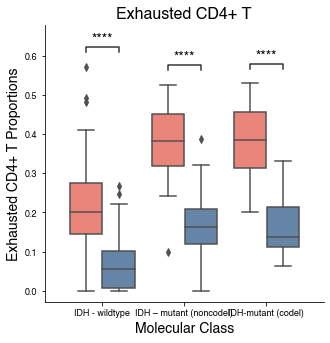

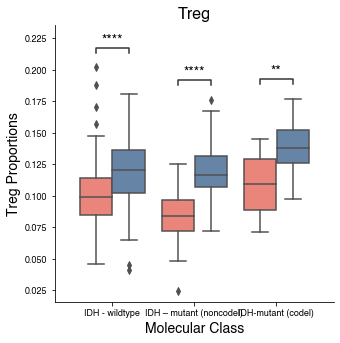

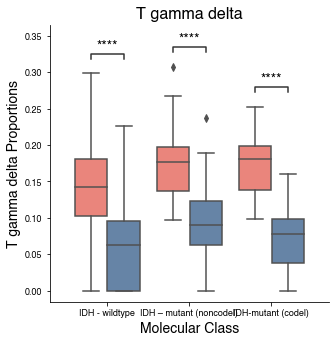

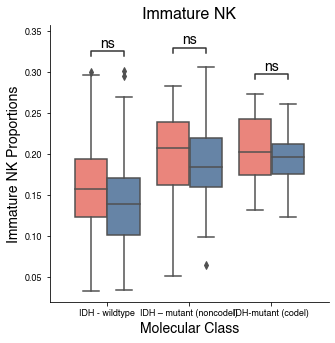

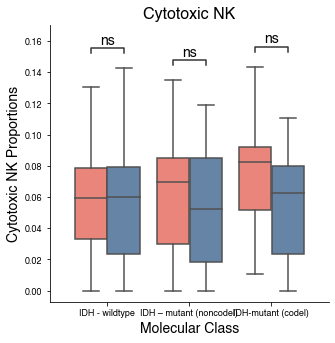

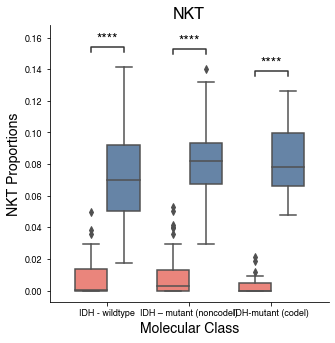

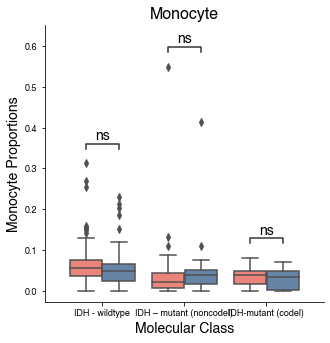

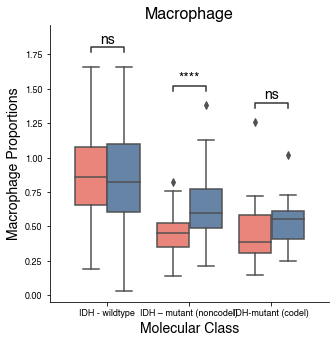

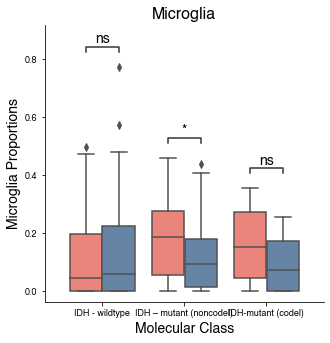

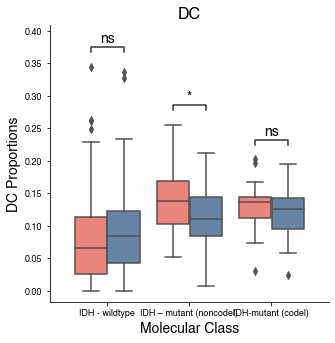

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import statannot
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

box_pairs=[
    (("IDH - wildtype", "Initial"), ("IDH - wildtype", "Recurrence")),
    (("IDH – mutant (noncodel)", "Initial"), ("IDH – mutant (noncodel)", "Recurrence")),
    (("IDH-mutant (codel)", "Initial"), ("IDH-mutant (codel)", "Recurrence"))
    ]

cells = list(Initial_absolute.T[0:22].index)
for c in cells:
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
    plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Molecular Class', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Molecular Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)  
    
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Molecular Class',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )
    plt.savefig(c+'.png')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.487e-11 stat=-7.718e+00
IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.111e-06 stat=-5.243e+00
IDH-mutant (codel)_Initial v.s. IDH-mutant (codel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.618e-03 stat=-3.821e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.357e-01
IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test

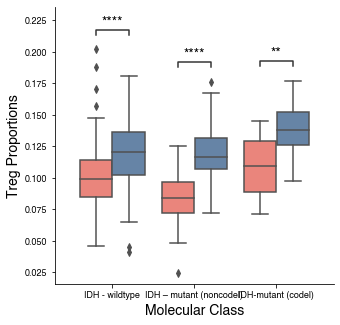

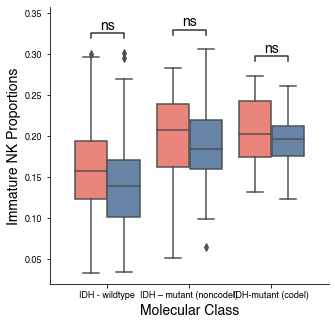

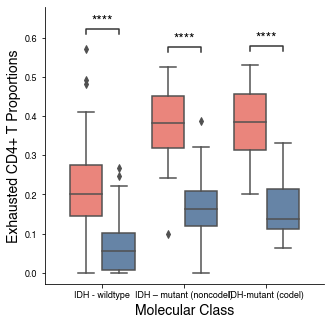

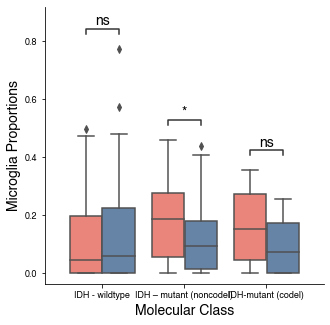

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import statannot
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

box_pairs=[
    (("IDH - wildtype", "Initial"), ("IDH - wildtype", "Recurrence")),
    (("IDH – mutant (noncodel)", "Initial"), ("IDH – mutant (noncodel)", "Recurrence")),
    (("IDH-mutant (codel)", "Initial"), ("IDH-mutant (codel)", "Recurrence"))
    ]

cells = ["Treg", "Immature NK", "Exhausted CD4+ T", "Microglia"]
for c in cells:
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
#     plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Molecular Class', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Molecular Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)  
    
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Molecular Class',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )
    plt.savefig(c+'.png')


In [17]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for c in cells:
    specific_cell_type = final_mdf.loc[final_mdf['variable'] == c]
    for m in m_class:
        specific_class = specific_cell_type.loc[specific_cell_type['Molecular Class'] == m]
        first = specific_class.loc[specific_class['Type'] == 'Initial']
        second = specific_class.loc[specific_class['Type'] == 'Recurrence']
        print(c,' - ', m)
        print('Between Initial and Recurrence: ')
        print(ranksums(first.iloc[:,4], second.iloc[:,4]))
        print ('--------------------------------')

Treg  -  IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=-5.474363299984814, pvalue=4.390874354253941e-08)
--------------------------------
Treg  -  IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-6.2996497910148666, pvalue=2.9831888840766194e-10)
--------------------------------
Treg  -  IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-3.2587757854169133, pvalue=0.0011189406217392251)
--------------------------------
Immature NK  -  IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=2.41691206582647, pvalue=0.01565279801310114)
--------------------------------
Immature NK  -  IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=1.2352254492186012, pvalue=0.21674661032678177)
--------------------------------
Immature NK  -  IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=0.5378561975930828, pvalue=0.5906763307135376)
--